# Lo-Fi, o gênero musical que explodiu durante a pandemia

## Introdução

Lo-fi é o diminutivo de Low Fidelity (baixa qualidade, em inglês). Quando um artista não tem recursos para bancar grandes produções e acaba fazendo tudo no seu home studio, ele fica, geralmente, limitado à pouco qualidade da gravação, criando registros sonoros com imperfeições.

Misturando batidas do jazz e do hip-hop, a música lo-fi tem essa característica da leveza, da simplicidade e, em grande parte, livre de vocais. Muitas vezes, recorre a truques que deixam a obra mais interessante, como o uso de gravadores de fita cassete, instrumentos musicais "de brinquedo" ou simplesmente um computador ligado a um controlador.

As composições que seguem o estilo Lo-fi usam batidas e 'samples' em um loop infinito. Especialistas em música e terapeutas explicam que o cérebro prevê, em um nível subconsciente, como a música vai continuar nos próximos minutos, fazendo com que a pessoa consiga desviar a atenção do som para focar outras coisas, gerando um efeito relaxante.

Esse gênero se tornou bem popular durante a pandemia do coronavírus, ele tem sido muito buscada para auxiliar a manter o foco em casa, durante o trabalho em home-office, ou mesmo para relaxar enquanto se lê um livro ou espera o sono chegar.

## Descrição do projeto

O gênero "lofi" tem sido tendência nas comunidades online, especialmente no Youtube. Dada sua populariade, vamos explorar nesse projeto os termos, títulos e 'keywords' que estão dominando a soudtrack da vida atual.

Esse projeto é dividido em 3 partes:

1. Tendências ao longo do tempo em lofi (Google Trends);
2. Compilações de músicas/playlists lofi (Youtube)
3. Visual de fã arte lofi (DeviantArt)

## 1. Tendência ao Longo do Tempo em LoFi (*Google Trends*)

In [2]:
# Importando as Bibliotecas usadas nessa seção

import pandas as pd
import numpy as np
import datetime
from datetime import timezone, datetime, timedelta, date
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})

from pytrends.request import TrendReq
pytrends = TrendReq(hl='pt-BR',tz=360)


### 1.1 Tendências Mundiais

Nesta primeira parte do projeto, vamos rastrear a popularidade relativa do termo "lofi", ao longos dos últimos anos, através do *Google Trends API*, usando a ferramenta *Pytrends*. 

O *Google Trends* fornece os dados de popularidade relativa e não o volume real de pesquisa.Os números representam o interesse de pesquisa em relação ao ponto mais alto do gráfico. Um valor de 100 é o pico de popularidade do termo. Um valor de 50 significa que o termo tem metade da popularidade. Uma pontuação de 0 significa que não havia dados suficientes para este termo 

In [3]:
# Cria um "payload" e captura tokens API mundiais da palavra-chave 'lofi'
pytrends.build_payload(kw_list=['lofi'])

#### 1.1.a) Buscas Relacionadas

Vamos ver quais os termos (palavras-chave) que acompanham as consultas de quem busca por lofi ao redor do mundo.

In [4]:
# Buscas relacionadas a 'lofi' no mundo
related_queries = pytrends.related_queries()

In [4]:
# Seleciona os dados
queries_index = related_queries['lofi']['top']['query'].values
queries_values = related_queries['lofi']['top']['value'].values

# Cria um dataframe 
related_queries_df = pd.DataFrame(data=queries_values, index=queries_index, columns=['Popularity'])
related_queries_df = related_queries_df.sort_values(by='Popularity', ascending=True)

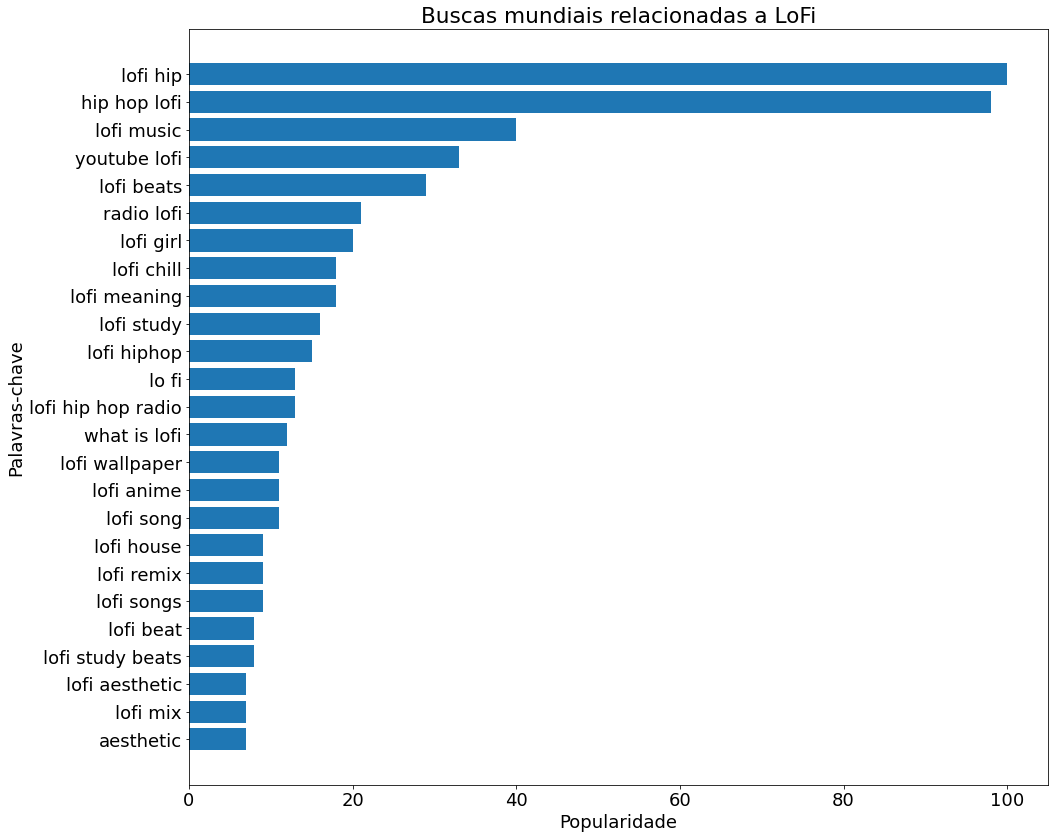

In [5]:
# Desenha um gráfico de barras com o resultado
plt.figure(figsize=(15,12))
plt.barh(related_queries_df.index,related_queries_df['Popularity'])
plt.title("Buscas mundiais relacionadas a LoFi")
plt.xlabel("Popularidade")
plt.ylabel("Palavras-chave")
plt.tight_layout()
plt.show()

Buscas sobre lofi acompanham termos como "hip hop", "music", "youtube", "radio", "beats", "girl", "chill", "study".

#### 1.1.b) Tópicos Relacionados

Queremos agora ver quais os assuntos que estão relaciondos com lofi o redor do mundo.

In [6]:
# Tópicos de assuntos relacionados a 'lofi' no mundo
related_topic = pytrends.related_topics()

In [7]:
# Seleciona os dados
topic_index = related_topic['lofi']['top']['topic_title'].values
topic_values = related_topic['lofi']['top']['value'].values
topic_type = related_topic['lofi']['top']['topic_type'].values

# Organiza os daods em um dicionário
d = {'type':topic_type, 'Popularity': topic_values}

# Gera um dataframe
related_topic_df = pd.DataFrame(data=d, index=topic_index)
related_topic_df

,type,Popularity
Música Lo-fi,Gênero musical,100
Lofi Hip Hop,Assunto,19
Música,Assunto,9
Hip hop,Gênero musical,6
E-Hentai,Website,3
Papel de parede,Assunto,2
Anime,Gênero literário,2
Remix,Assunto,2
Batida,Música,2
Lofi Hip Hop Radio,Canção,2


O tópico de maior popularidade é "Música e "Hip Hop" e está relacionado com "Gênero Musical". Temos também tópicos como "Chill", "Bateria", "Piano", "Tambor", "Direito Autoral", "Batida", "Remix", "Spotify" e "Papel de parede".

#### 1.1.c) Interesse ao Longo do Tempo

Analisamos agora a evolução temporal da popularidade do termo lofi no mundo.

In [8]:
# Interesses mundial ao longo do tempo sobre 'lofi'
interest_over_time = pytrends.interest_over_time()

In [9]:
# Cria uma tabela com os valores
interest_over_time = interest_over_time[interest_over_time.index>=datetime(2015,1,1)]\
.pivot_table(values=['lofi'], index='date')

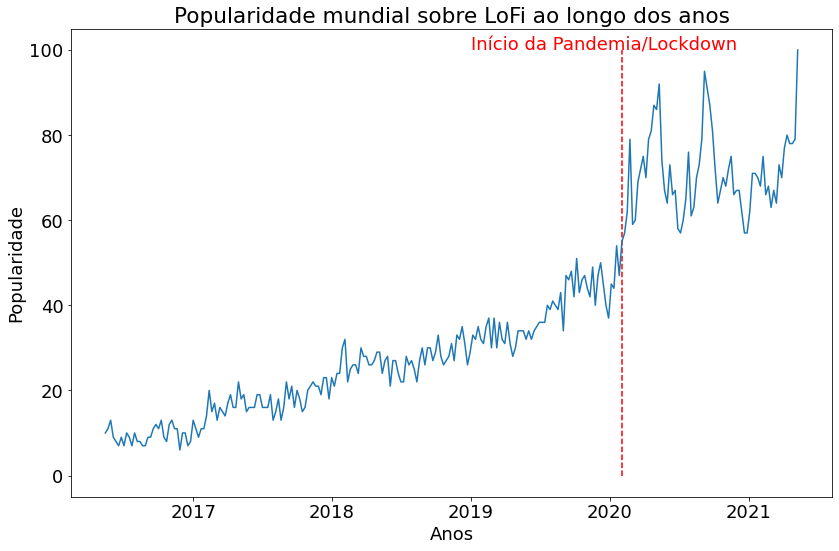

In [10]:
plt.figure(figsize=(12,8))
plt.plot(interest_over_time)
plt.vlines(date(2020,2,1),0,100,color='red',linestyles='--')
plt.annotate('Início da Pandemia/Lockdown', (date(2019,1,1),100),color="red")
plt.title("Popularidade mundial sobre LoFi ao longo dos anos")
plt.xlabel("Anos")
plt.ylabel("Popularidade")
plt.tight_layout()
plt.show()

Desde 2017, assuntos relacionados com lofi já mostravam crescimento. Porém, em Fevereiro de 2020 (linha vermelha no gráfico), quando explode a pandemia e o lockdown em diversos países ao redor do mundo, temos um alto crescimento da popularidade do termo lofi.

#### 1.1.d) Países Onde é Mais Popular

Analisar os países onde lofi possui maior popularidade.

In [12]:
# Países onde 'lofi' é mais popular
interest_region = pytrends.interest_by_region(resolution='COUNTRY')
# Ordena a tabela por valores e seleciona as 30 primeiras linhas
interest_region = interest_region.sort_values(by='lofi', ascending=False)[0:30]

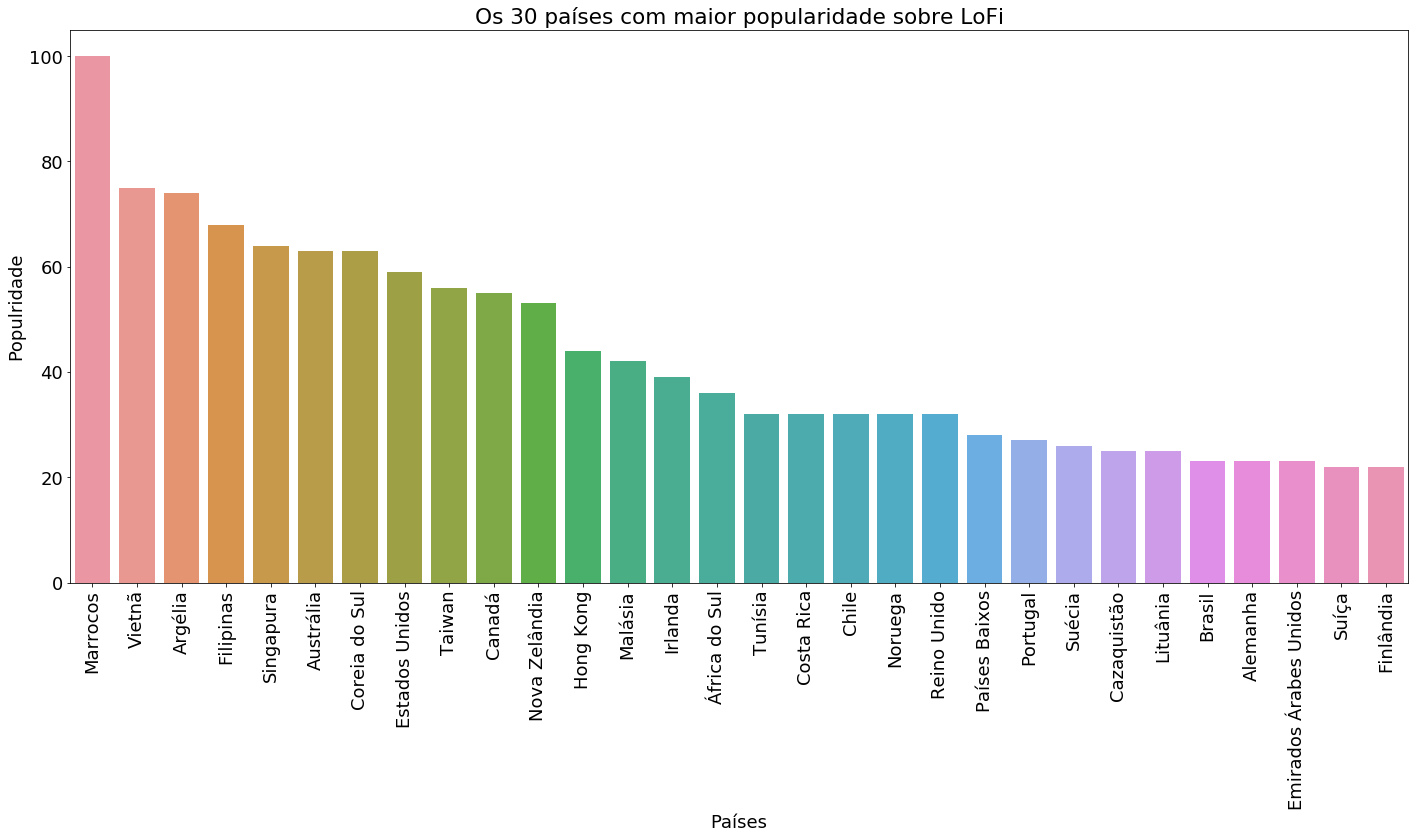

In [13]:
plt.figure(figsize=(20,12))
sns.barplot(x=interest_region.index,y='lofi',data=interest_region)
plt.xticks(rotation=90)
plt.title("Os 30 países com maior popularidade sobre LoFi")
plt.xlabel("Países")
plt.ylabel("Populridade")
plt.tight_layout()
plt.show()

Entre os países com maior popularidade sobre esse gênero musical temos:
* Os africanos como Marrocos e Argélia;
* Os países asiáticos como Vietnã, Filipinas, Singapura, Coréia do Sul e Taiwan;
* E países de língua inglesa como Austrália, Estados Unidos, Canadá e Nova Zelândia.

### 1.2 Tendências no Brasil

Vamos reproduzir os mesmos procedimentos anteriores porém agora com nossa pesquisa direcionada especificamente para o Brasil.

#### 1.2.a) Buscas relacionadas

Analisar quais os termos (palavras-chave) que acompanham as consultas e quem busca por lofi no Brasil.

In [13]:
# Cria uma 'playload' da palavra-chave lofi nas pesquisas no Brasil
pytrends.build_payload(kw_list=['lofi'],timeframe='today 5-y', geo='BR')

In [14]:
# Buscas relacionadas com 'lofi' no Brasil
related_queries_BR = pytrends.related_queries()

In [15]:
# Seleciona os dados de interesse
queries_indexBR = related_queries_BR['lofi']['top']['query'].values
queries_valuesBR = related_queries_BR['lofi']['top']['value'].values
# Cria um DataFrame
related_queries_BR = pd.DataFrame(data=queries_valuesBR, index=queries_indexBR, columns=['Popularity'])
# Ordena a tabela 
related_queries_BR = related_queries_BR.sort_values(by='Popularity', ascending=True)

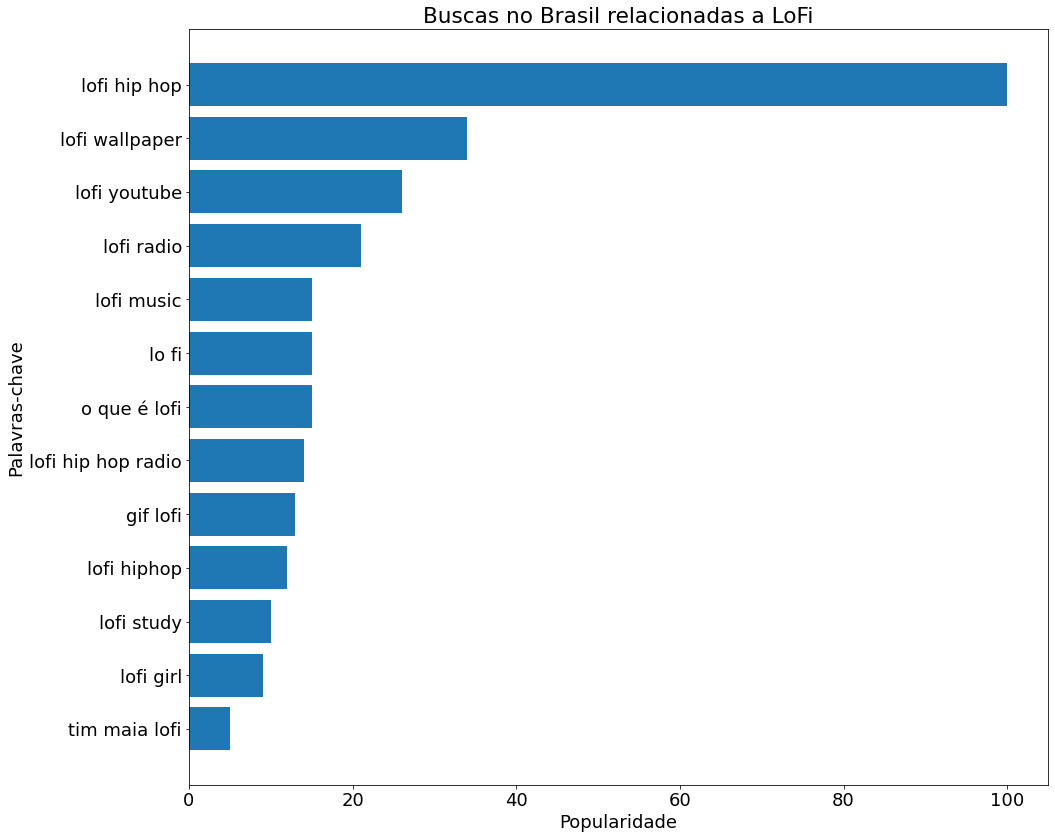

In [16]:
plt.figure(figsize=(15,12))
plt.barh(related_queries_BR.index,related_queries_BR['Popularity'])
plt.title("Buscas no Brasil relacionadas a LoFi")
plt.xlabel("Popularidade")
plt.ylabel("Palavras-chave")
plt.tight_layout()
plt.show()

As palavras-chave mais populares que acompanham lofi, no Brasil, são "hip hop", "wallpaper", "youtube", "radio", entre outros termos semelhantes ao que encontramos nas buscas no mundo. De novidade temos as buscas sobre "tim maia lofi".

#### 1.2.b) Tópicos Relacionados

Buscar por tópicos que são relaciondos com lofi no Brasil.

In [17]:
# Tópicos relacionados a 'lofi' no Brasil
related_topic_BR = pytrends.related_topics()

In [18]:
# Seleciona os dados de interesse
topic_indexBR = related_topic_BR['lofi']['top']['topic_title'].values
topic_valuesBR = related_topic_BR['lofi']['top']['value'].values
topic_typeBR = related_topic_BR['lofi']['top']['topic_type'].values
# Cria um dicionário com os dados selecionados
d_BR = {'type':topic_typeBR, 'value': topic_valuesBR}
# Adiciona o dicioário em um DataFrame
related_topic_BR = pd.DataFrame(data=d_BR, index=topic_indexBR)
related_topic_BR

,type,value
Música Lo-fi,Gênero musical,100
Lofi Hip Hop,Assunto,15
Papel de parede,Assunto,8
Hip hop,Gênero musical,6
GIF,Formato de arquivo,3
Spotify,Software baixável,2
Canção,Tipo de composição,2
Lofi Hip Hop Radio,Canção,2
Tim Maia,Cantor-compositor,1
Batida,Música,1


Tópicos mais populares no Brasil, assim como no mundo, são "Música", "Hip Hop" e "Papel de Parede". Tópicos novos como "GIF", "Tim Maia", "I Love You Baby", "Resolução 4K" aparecem na lista.

#### 1.2.c) Interesses ao Longo do Tempo

Evolução temporal da popularidade do termo lofi no Brasil. 

In [19]:
# Interesses sobre 'lofi' ao longo do tempo no Brasil
interest_over_time_BR = pytrends.interest_over_time()

In [20]:
interest_over_time_BR = interest_over_time_BR[interest_over_time_BR.index>=datetime(2015,1,1)]\
.pivot_table(values=['lofi'], index='date')

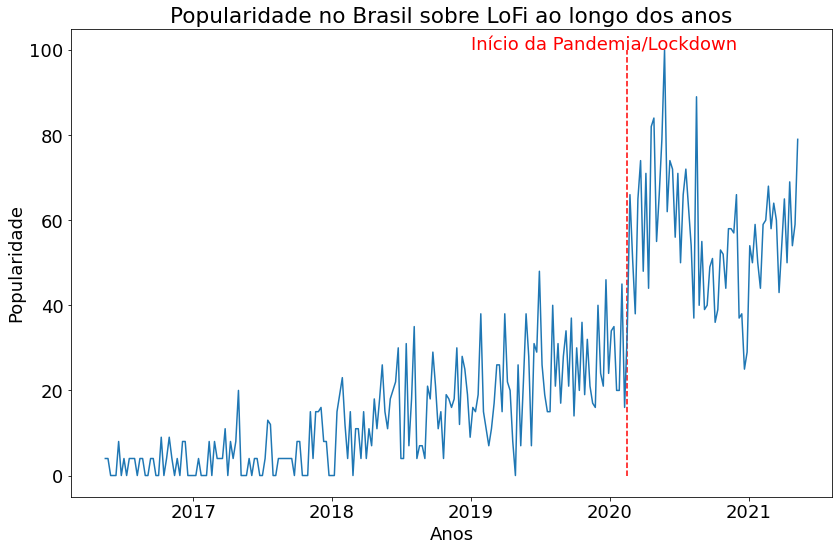

In [21]:
plt.figure(figsize=(12,8))
plt.plot(interest_over_time_BR)
plt.vlines(date(2020,2,15),0,100,color='red',linestyles='--')
plt.annotate('Início da Pandemia/Lockdown', (date(2019,1,1),100),color="red")
plt.title("Popularidade no Brasil sobre LoFi ao longo dos anos")
plt.xlabel("Anos")
plt.ylabel("Popularidade")
plt.tight_layout()
plt.show()

Vemos que até 2018, a popularidade sobre lofi no Brasil era muito baixa. No meio do mesmo ano, os índices de popularidade iniciam um pequeno aumento. Em 2020, à partir da segunda quinzena de fevereiro e início de março (Início da pandemia/lockdown no Brasil), a popularidade explode. No final do mesmo ano de 2020 temos uma queda nos índices de popularidade, porém temos uma visível retomada do crescimento nos primeiros meses de 2021.

#### 1.2.d) Estados com Maior Popularidade

Analisar a popularidade nos estados e se existe uma região específica no Brasil onde há um maior público.

In [22]:
# Estados do Brasil onde 'lofi' é mais popular
interest_regionBR = pytrends.interest_by_region(resolution='REGION')
# Ordena a tabela
interest_regionBR = interest_regionBR.sort_values(by='lofi', ascending=False)

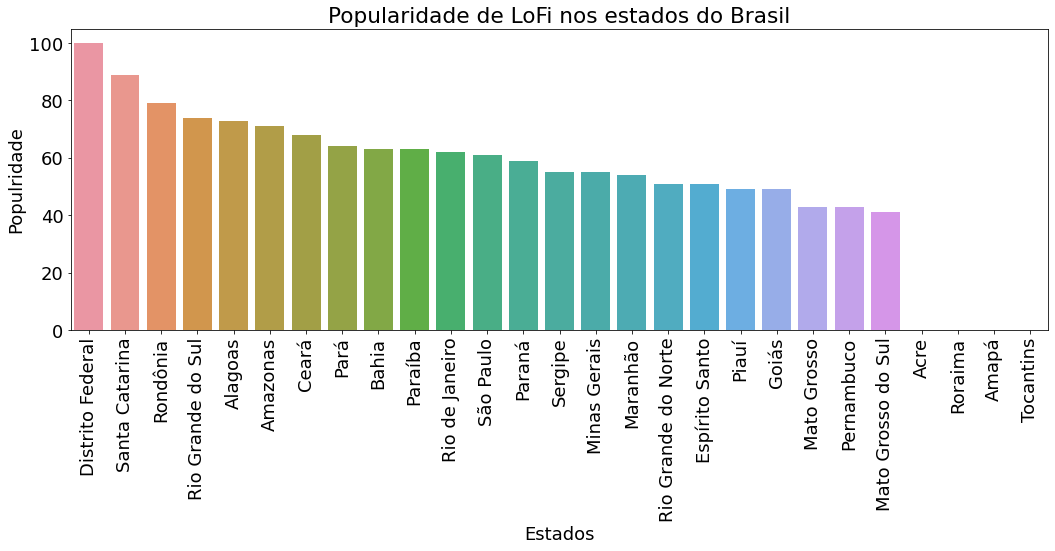

In [23]:
plt.figure(figsize=(15,8))
sns.barplot(x=interest_regionBR.index,y='lofi',data=interest_regionBR)
plt.xticks(rotation=90)
plt.title("Popularidade de LoFi nos estados do Brasil")
plt.xlabel("Estados")
plt.ylabel("Populridade")
plt.tight_layout()
plt.show()

As maiores pontuações de popularidade são ocupados por diferentes estados em diferentes posições, assim não existe uma determinada região que sobreponha as demais. Como destaque, temos o Distrito Federal, Santa Catarina e Rondônia no pódio de populariade.

### 1.3 Considerações da Parte 1

Nessa primeira parte do projeto, utilizamos o *Pytrends* para obter informações do *Google Trend API* e analisamos as palavras-chave, tópicos e assuntos de maior popularidade relacionadas ao gênero musical lofi no mundo e no Brasil.

Reafirmamos que houve um visível crescimento na popularidade durante a pandemia/lockdown no ano de 2020, tanto nos países ao redor do mundo quanto no Brasil. 

## 2. Compilações de Músicas/Playlists LoFi (*Youtube*)

O *Youtube* é uma das plataformas mais utilizadas na reprodução de diferentes tipos e estilos musicais. Neste segunda parte do projeto, estaremos analisando os títulos, nome dos canais e visualizações dos videos contendo músicas do gênero lofi no *Youtube*. O objetivo dessa pesquisa é descobrir os termos usados nos videos/canais sobre lofi com grande visibilidade.

Para realizar essa tarefa, usaremos os filtros de busca do *Youtube* em duas características, "Creative Commons" e "Ao Vivo", ambos ordenador por "Contagem de Visualizações".

Para abrir e coletar as páginas da web usaremos a ferramenta *Selenium*, pois ela funciona muito bem em sites que usam o javascript, como é o caso do *Youtube*. No momento de ler as informações (html) do site, usaremos a ferramente *BeautifulSoup* devido a sua simplicidade e eficiência no manuseio. 

Como o *Youtube* é um site dinâmico, é importante ressaltar que os dados, como os tipos de videos mostrados nas buscas e suas visualização, estão sujeitas a constantes mudanças.

In [15]:
# Importando as bibliotecas usadas nessa seção

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':15})
import seaborn as sns

from selenium import webdriver
from bs4 import BeautifulSoup
import time

import re

import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MichelinJV\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### 2.1 Coletando Dados da Internet - Web Scraping

Iniciamos criando um dicionário com os endereços das páginas de pesquisa no youtube, onde foram usados os filtros de busca nas categorias "creative commons" e "ao vivo".

In [2]:
# Dicionário com os url

dict_url = {"creative_commons": "https://www.youtube.com/results?search_query=lofi&sp=CAMSAjAB",
            "ao_vivo": "https://www.youtube.com/results?search_query=lofi&sp=CAMSAkAB"
             }

Criamos uma função que abre as páginas web e as lêem

In [4]:
def crawling(url):
    '''
    Rastreador de página web usando o Selenium para abrir a página
    '''
    
    driver = webdriver.Edge(executable_path='./msedgedriver.exe')
    driver.get(url)

    # Determina a altura de rolagem da página
    last_height = driver.execute_script("return document.body.scrollHeight")

    while True:
        # Rolagem para baixo
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

        # Espera carregar a página
        time.sleep(1)

        # Calcula a nova altura de rolagem e compara com a altura da última rolagem
        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            break
        last_height = new_height

    content = driver.page_source.encode('utf-8').strip()
    
    # Lê o html a página
    bs = BeautifulSoup(content,'html.parser')
    
    # Fecha o webdriver
    driver.quit()
    
    return bs

Mais duas funções são criadas para coletar os dados das páginas e criar um DataFrame com os dados obtidos para as diferentes características de busca.

In [53]:
def scraping_creative_commons(bs):
    '''
    Extrai informação dos videos na característica "Creative Commons"
    '''
    view=[]
    title = []
    channel = []
    # Coleta as quantidades visualizações
    statistics = [item for item in bs.find_all('span',class_="style-scope ytd-video-meta-block")]
           
    for s in range(0,len(statistics)):
        if re.findall('visualizações',statistics[s].text):
            view.append(statistics[s].text)
        
    # Coleta os títulos dos vídeos
    titles = [item for item in bs.findAll('a',id='video-title')]
    for t in range(0,len(titles)):
        title.append(titles[t].attrs['title']) # Salva numa lista

    # Coleta o nome dos canais 
    channels = [item for item in bs.findAll('a',class_="yt-simple-endpoint style-scope yt-formatted-string")]
    for c in range(0,len(channels)):
        if c%2!=0:   # Evita nomes duplicados
            channel.append(channels[c].text) # Salva numa lista 

    # Cria um data frame para salvar os dados  
    creative = pd.DataFrame()  
    creative['Title'] = title
    creative['Channel'] = channel
    creative['Views'] = view
          
    return creative

In [54]:
def scraping_ao_vivo(bs):
    ''''
    Extrai informações dos videos na característica "Ao Vivo"
    '''
    
    # Coleta os títulos dos vídeos
    titles = [item for item in bs.findAll('a',id='video-title')]
    title = []
    for t in range(0,len(titles)):
        title.append(titles[t].attrs['title'])

    # Coleta os nomes dos canais
    channels = [item for item in bs.findAll('a',class_="yt-simple-endpoint style-scope yt-formatted-string")]
    channel = []
    for c in range(1,len(channels)):
        if c%2!=0: # Evita nome duplicados
            channel.append(channels[c].text)


    # Coleta as visualizações
    watching = [item for item in bs.findAll('span',class_="style-scope ytd-video-meta-block")]
    watched = []
    for w in range(1,len(watching)):
        watched.append(watching[w].text)
     
    # Cria um dataframe para salvar os dados
    ao_vivo = pd.DataFrame()
    ao_vivo['Title'] = title
    ao_vivo['Channel'] = channel
    ao_vivo['Viewers'] = watched
        
    return ao_vivo   

Vamos exibir os DataFrames com os dados coletados.

* Categoria "Creative Commons"

In [9]:
# Chama as funções de crawling e scraping
creative = scraping_creative_commons(crawling(dict_url['creative_commons']))

# Mostra as primeiras linhas do dataframe para 'Creative Commons'
creative.head()

,Title,Channel,Views
0,Early morning vibes... 😴,STEEZYASFUCK,129 mil visualizações
1,Poké & Chill,GameChops,7 mi de visualizações
2,[ｌｏｆｉ] ＭＩＮＥＣＲＡＦＴ,Chillhop Beats,4 mi de visualizações
3,lofi hip hop radio – beats to sleep/study/rela...,STEEZYASFUCK,"3,4 mi de visualizações"
4,Tere Bina ~ LOFI - A. R. Rahman | Malhar_Music...,Midnight Vibes,"2,4 mi de visualizações"


* Categoria "Ao Vivo"

In [10]:
# Chama as funções de crawling e scraping
ao_vivo = scraping_ao_vivo(crawling(dict_url['ao_vivo']))

# Mostra as primeiras linhas do dataframe para 'Ao Vivo'
ao_vivo.head()

,Title,Channel,Viewers
0,lofi hip hop radio - beats to relax/study to,Lofi Girl,23 mil assistindo
1,lofi hip hop radio - beats to sleep/chill to,Lofi Girl,6 mil assistindo
2,ＣＨＩＬＬ ＲＡＤＩＯ ２４／７,the bootleg boy 2,"2,5 mil assistindo"
3,coffee shop radio // 24/7 lofi hip-hop beats,STEEZYASFUCK,"1,8 mil assistindo"
4,Chillhop Radio - jazzy & lofi hip hop beats 🐾,Chillhop Music,"1,7 mil assistindo"


In [11]:
# Cria cópias dos DataFrames para que os dados originais não se percam

creative_df = creative.copy()

ao_vivo_df = ao_vivo.copy()

### 2.2 Limpando os Dados - Data Cleaning

Após a coleta dos dados, temos que organizar e limpar seus formatos antes de analisá-los.

Vamos começar com as colunas onde mostram os números de visualizações/assistindo. 

* Categoria "Creative Commons"

In [12]:
# Troca 'mi' por 000000, 'mil' por 000, retira vírgula e espaços em branco
creative_df['Views'] = creative_df['Views'].str.replace(',','')\
.str.replace('mi ','000000 ').str.replace('mil','000').str.replace(' ','')

# Retira a palavra 'visualizações' e o unicode '\xa0'
creative_df['Views'] = creative_df['Views'].str.replace('de',' ').str.replace('visualizações','')\
.str.replace(u'\xa0',u'')

# Altera o formato da coluna para numérica
creative_df['Views'] = creative_df['Views'].astype(np.int64)

* Categoria "Ao Vivo"

In [13]:
# Troca 'mil' por 000, retira vírgula e espaços em branco
ao_vivo_df['Viewers'] = ao_vivo_df['Viewers'].str.replace(',','')\
.str.replace('mil','000').str.replace(' ','')

# Retira a palavra 'assistindo' e o unicode '\xa0'
ao_vivo_df['Viewers'] = ao_vivo_df['Viewers'].str.replace('assistindo','')\
.str.replace(u'\xa0',u'')

# Altera o formato da coluna para numérica
ao_vivo_df['Viewers'] = ao_vivo_df['Viewers'].astype(np.int64)

Temos que agora limpar os caracteres nas strings dos títulos dos videos

In [55]:
# Retira caracteres dos títulos
creative_df['Title'] = creative_df['Title'].str.replace('|','').str.replace('&','')\
.str.replace('~','').str.replace('/','').str.replace('(','').str.replace(')','')\
.str.replace('to','').str.replace('-','').str.replace('.','').str.replace('」','')\
.str.replace('“','').str.replace('”','')

#Retira caractres dos títulos
ao_vivo_df['Title'] = ao_vivo_df['Title'].str.replace('-','').str.replace('&','')\
.str.replace('to','').str.replace('/','').str.replace('[','').str.replace(']','')\
.str.replace(':','').str.replace(',','')

C:\Users\MichelinJV\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  
C:\Users\MichelinJV\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\MichelinJV\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.
C:\Users\MichelinJV\anaconda3\lib\site-packages\ipyke

In [42]:
# Ordena os dados pelo número de visualizações

creative_df = creative_df.sort_values(by='Views', ascending=False)

ao_vivo_df = ao_vivo_df.sort_values(by='Viewers',ascending=False)

Com os dados limpos, vamos ver como ficou os DataFrames

In [48]:
print('Creative Commons')
creative_df.head(10)

Creative Commons


,Title,Channel,Views
3,lofi hip hop radio – beats sleepstudyrelax ☕,STEEZYASFUCK,34000000
4,Tere Bina LOFI A R Rahman Malhar_Music Flip...,Midnight Vibes,24000000
5,Zelda Chill 2,GameChops,21000000
6,"1 Giờ Nghe Nhạc Lofi Thư Giãn Đọc Sách, Học Tậ...",Vương Lại Thế,16000000
7,no copyright music lofi type beat biscuit fre...,LuKremBo,14000000
8,ＭＩＮＥＣＲＡＦＴ x Mix de hip hop LoFi 🎵 [música sono...,Chill Out Tube,13000000
9,Lo fi boriswave beats para relaxar fazer o br...,Conservatives,11000000
1,Poké Chill,GameChops,7000000
2,[ｌｏｆｉ] ＭＩＮＥＣＲＡＦＴ,Chillhop Beats,4000000
10,Zelda Chill Canção das Tempestades,GameChops,1000000


In [47]:
print('Ao Vivo')
ao_vivo_df.head(10)

Ao Vivo


,Title,Channel,Viewers
2,ＣＨＩＬＬ ＲＡＤＩＯ ２４／７,the bootleg boy 2,25000
0,lofi hip hop radio beats relaxstudy,Lofi Girl,23000
3,coffee shop radio 247 lofi hiphop beats,STEEZYASFUCK,18000
4,Chillhop Radio jazzy lofi hip hop beats 🐾,Chillhop Music,17000
5,lofi hip hop radio beats studyrelax 🐾,Chillhop Music,14000
6,🔊BASS BOOSTED CAR MUSIC🔊 BEST EDM HOUSE ELECTR...,LoFi VIBES,11000
1,lofi hip hop radio beats sleepchill,Lofi Girl,6000
7,rb hiphop radio chill live stream － 247 rnb,Matthew Chávez,882
8,lofi hip hop radio – beats sleepstudyrelax ☕,STEEZYASFUCK,769
9,Radio 24420 lofi hip hop | beats relaxchill,Lofi Zone,742


### 2.3 Analisando os Dados - Data Analysis

Após coletar e limpar os dados, começamos a anlisá-los para obter as informações dos termos mais usados.

#### 2.3.a) Títulos dos Videos com Maior Visualizações/Assistindo.

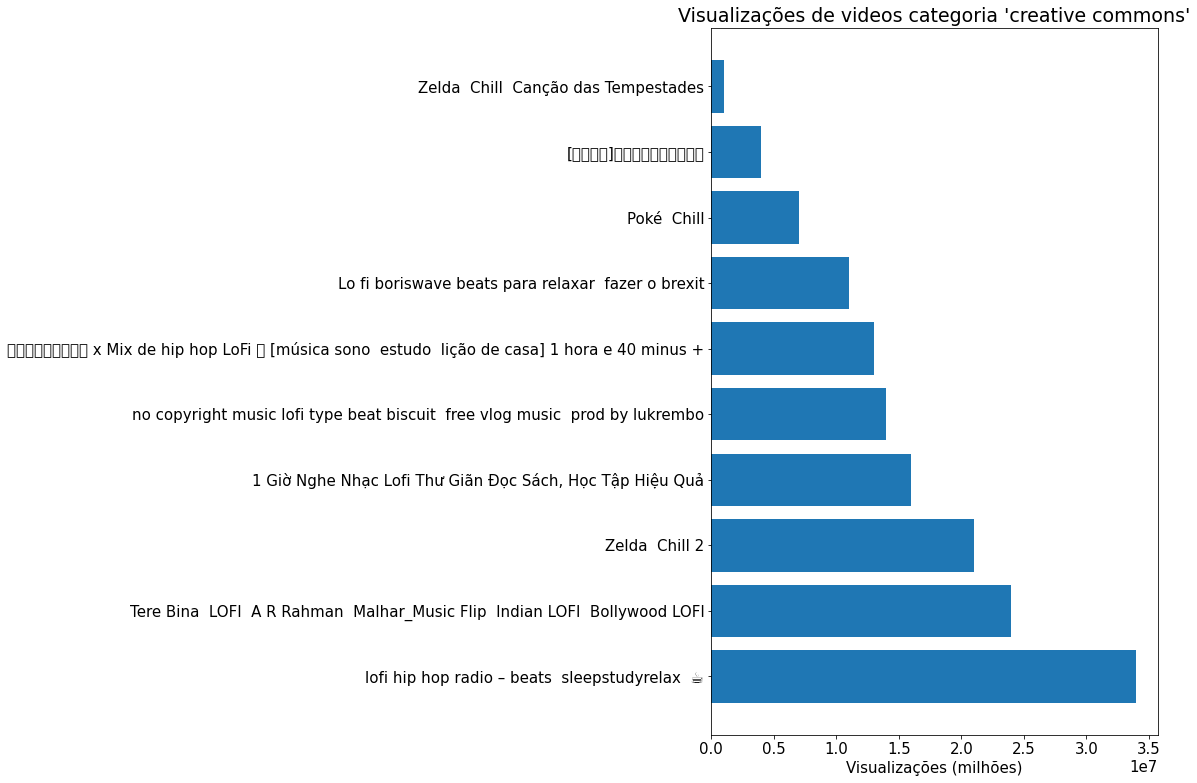

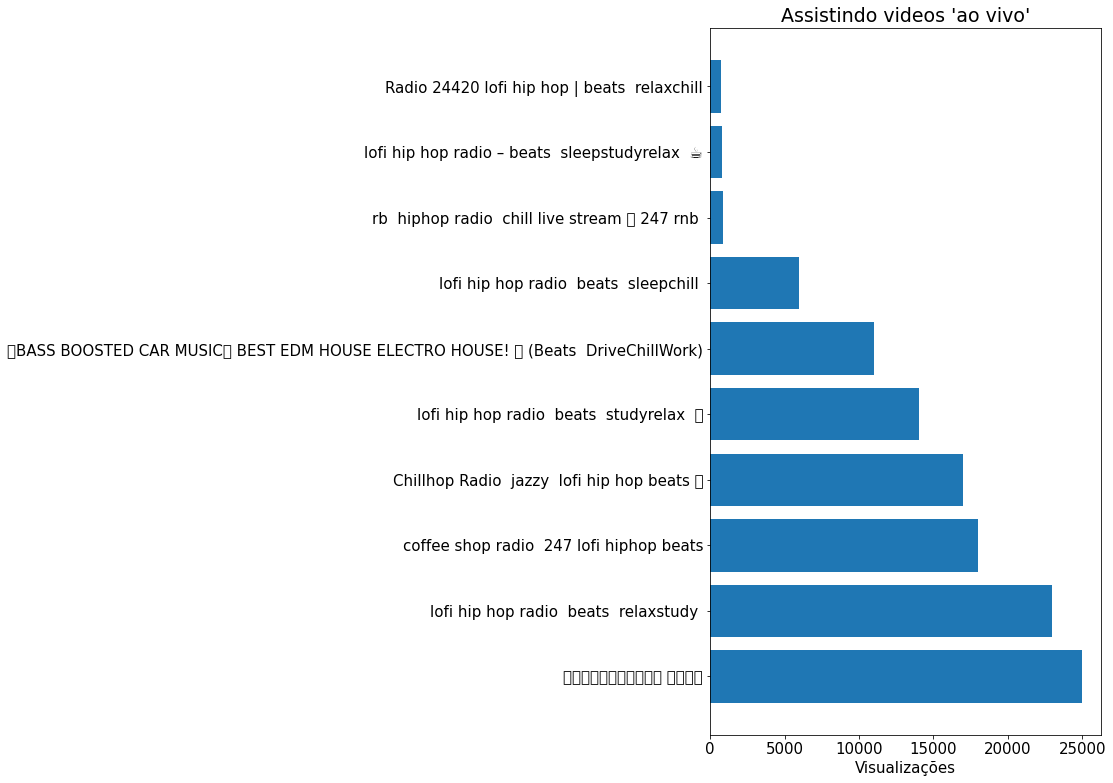

In [57]:
plt.figure(figsize=(8,13))
plt.barh(creative_df.Title[:10],creative_df.Views[:10])
plt.title("Visualizações de videos categoria 'creative commons'",fontsize=19)
plt.xlabel("Visualizações (milhões)")


plt.figure(figsize=(7,13))
plt.barh(ao_vivo_df.Title[:10],ao_vivo_df.Viewers[:10])
plt.title("Assistindo videos 'ao vivo'",fontsize=19)
plt.xlabel("Visualizações")
plt.show()

Termos como "Zelda", "Minicraft", "beats", "radio" e "chill", "relax", "jazz" são usados nos títulos do vídeos sobre lofi.

#### 2.3.b) Visualizações por Canal

In [28]:
# Agrupa os dados pelas visualizações correspondentes nos videos do mesmo canal
channel_creative = creative_df[['Channel','Views']].groupby('Channel').agg(list)

channel_ao_vivo = ao_vivo_df[['Channel','Viewers']].groupby('Channel').agg(list)

print('Creative Commons')
print(channel_creative)
print()
print('Ao Vivo')
print(channel_ao_vivo)

Creative Commons
                                                   Views
Channel                                                 
Chill Out Tube                                [13000000]
Chillhop Beats                                 [4000000]
Conservatives                                 [11000000]
Dj CUTMAN                                       [909000]
GameChops           [918000, 1000000, 7000000, 21000000]
LuKremBo                              [899000, 14000000]
Midnight Vibes        [552000, 564000, 871000, 24000000]
Palmasur Lo-Fi Mex                              [524000]
Pii Music                               [493000, 560000]
STEEZYASFUCK                          [129000, 34000000]
Vương Lại Thế                                 [16000000]

Ao Vivo
                               Viewers
Channel                               
AcidJazz                         [417]
Cafe Music BGM channel           [680]
Chill with Taiki                 [422]
Chilled Empire              [483, 611]

Como destaque, temos os termos 'Chill', 'Vibes', 'geek', 'Girl', 'Game' , 'Midnight', 'nostalgic', 'jazz' e 'cafe' aparecem nos nomes dos canais.

#### 2.3.c) Preprocessamento Textual dos Títulos dos Videos

Para analisar os textos dos títulos usaremos a ferramenta *NLTK*. Ela é um pacote Python que fornece vários algoritmos, entre eles a tokenalização, que consiste em 'quebrar' o texto em pequenas partes chamadas tokens.

In [30]:
# Gera tokens dos títulos e adiciona na lista word_creative
words_creative = [word_tokenize(sent) for sent in creative_df.Title]
word_creative = []
for w in words_creative:
    word_creative += w

# Gera tokens dos títulos e adiciona na lista word_ao_vivo   
words_ao_vivo = [word_tokenize(sent) for sent in ao_vivo_df.Title]
word_ao_vivo = []
for w in words_ao_vivo:
    word_ao_vivo += w

Vamos criar uma frequência de distribuição das palavras tokenalizadas

In [58]:
# Contagem de frequência de palavras na lista word_creative
fdist_creative = FreqDist(word_creative)
print("Tokens para Creative Commons")
print(fdist_creative.most_common(20))

print()
# Contagem de frequência de palavras na lista word_ao_vivo
fdist_aovivo = FreqDist(word_ao_vivo)
print("Tokens para Ao Vivo")
print(fdist_aovivo.most_common(20))

Tokens para Creative Commons
[('Lofi', 11), ('Chill', 6), ('music', 5), ('Flip', 4), ('Bollywood', 3), ('lofi', 3), ('Zelda', 3), ('LOFI', 3), ('Freak', 2), ('D', 2), ('Ver', 2), ('HOUR', 2), ('2', 2), ('chill', 2), ('no', 2), ('copyright', 2), ('type', 2), ('beat', 2), ('vlog', 2), ('prod', 2)]

Tokens para Ao Vivo
[('lofi', 12), ('hip', 10), ('hop', 10), ('radio', 10), ('beats', 10), ('Lofi', 7), ('Radio', 6), ('247', 6), ('Beats', 5), ('Chill', 3), ('Hip', 3), ('Hop', 3), ('LOFI', 2), ('sleepchill', 2), ('🚀', 2), ('Study', 2), ('studyrelax', 2), ('anime', 2), ('chill', 2), ('hiphop', 2)]


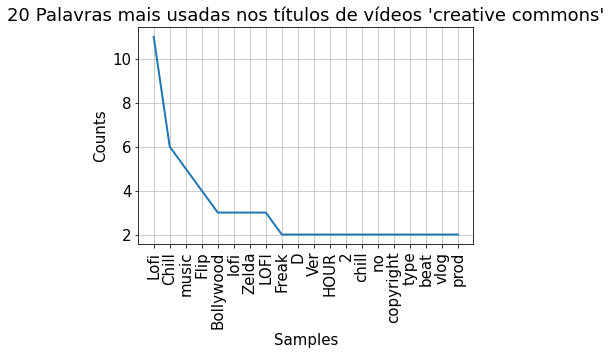

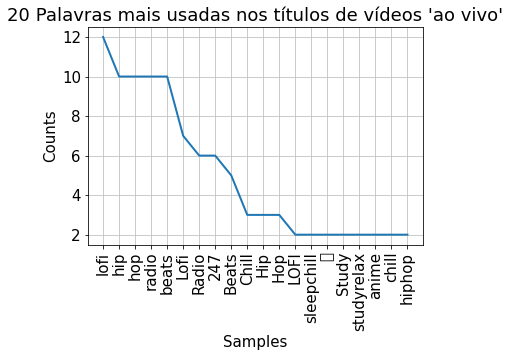

In [59]:
# Gera um gráfico com as frequência
fdist_creative.plot(20, cumulative=False,title="20 Palavras mais usadas nos títulos de vídeos 'creative commons'")
plt.show()

# Gera um gráfico com as frequência
fdist_aovivo.plot(20, cumulative=False,title="20 Palavras mais usadas nos títulos de vídeos 'ao vivo'")
plt.show()

As análise anteriores foram apenas visuais, já aqui temos as quantidade de vezes que os mesmos termos aparecem nos títulos dos videos. 

"Lofi", "hip", "hop", "chill" e "beats" são os mais usados, uma vez que espressam característica do estilo musical. vemos também termos como "Zelda" e "anime", relacionando esse gênero musical ao estilo geek/gamer/otaku. 

Também muito destacado são expressões como "relax", "study" e "sleep", relacionando a capacidae de relaxamente e melhora e de concentração oferecida aos ouvintes.

### 2.4 Considerações da Parte 2

Nessa segunda parte do projeto, extraímos dados do site *Youtube* e preprocessamos os títulos,nomes dos canais dos videos e visualizações.

Concluímos que os interesses dos ouvintes/internautas no gênero lofi estão relaciondos com termos como: **relax, study, sleep, radio, animes, games, chill, jazz, boy/girl, chill, cafe, geek, nostalgic, vibes, beats**. 

Para quem um dia quiser criar uma playlist/canal de música lofi, inserir esses termos é uma boa dica de sucesso nas visualizações.

## 3. Visual de Fã Arte LoFi (*DeviantArt*)

Mesmo que o lofi hip-hop seja um gênero musical, as fotos, visuais de álbuns e papéis e parede (wallpapers) associados ao gênero fornecem uma visão adicional sobre a atmosfera que o lofi invoca.

Nessa última parte do projeto, vasculhamos o site *DeviantArt* para analisar as tags e títulos das fã artes sobre lofi e determinar os assuntos que estão relacionados a lofi.

In [2]:
# Importando as bibliotecas usadas nessa seção

import requests 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

import requests
import urllib.request
from urllib.request import urlopen
from bs4 import BeautifulSoup

from datetime import datetime

from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer
import networkx as nx

### 3.1 Coletando Dados da Internet - Web Scraping 

Para começar, usamos o *BeautifulSoup* para coletar os endereços eletrônicos (url) das páginas de resultados da pesquisa no site do *DevianArt*. 

In [4]:
#  Cadeia de caracteres de agente do usuário
user_agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.74 Safari/537.36 Edg/79.0.309.43'
headers={'User-Agent':user_agent,} 
# primeira página da busca
url = 'https://www.deviantart.com/search/deviations?q=lofi'

In [5]:
# Endereço de base de pesquisa no DevianArte
base_url = "https://www.deviantart.com/search/deviations?"

# Cria um array para salvar os endereços 
urls = np.array([])

# Inicia um loop para varrer as primeiras 10 páginas de resultados de busca

for i in range(10):
    if i == 0:
        url = base_url + "q=lofi" # adiciona o termo de busca na ul de base de pesquisa
    else:
        url = base_url + "page=" + str(i) + "&q=lofi" # adiciona o número da página
    
    request=urllib.request.Request(url,None,headers)
    if url in urls:
        pass  # evita refazer a coleta de url já usados
    else:
        # Abre a página
        bs = BeautifulSoup(urlopen(request), "html.parser")
        # Varre os atributos na página e coleta os dados
        links = [item.get("href") for item in bs.find_all(attrs={"data-hook" : "deviation_link"})]
        # Adiciona as url na lista
        urls = np.append(urls, links)
    
print("Foram coletados: " + str(len(urls)) + " urls")

ipykernel_launcher:16: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


Foram coletados: 478 urls


 Durante as buscas, nas 10 páginas de buscas, foram enxontradas 478 fã artes. 
 
 Posivelmente, entre as ates encontradas, evem haver várias repetidas. Vamos pegar somente os url únicos e salvá-los em um DataFrame

In [65]:
# Cria um dataframe
df = pd.DataFrame()

# Adiciona as url únicas no dataframe
df['url'] = np.unique(urls)
# Quantidade de urls únicas
num = len(np.unique(df.url))
print("Quantidade de urls únicas:" ,num)
# Exibe as primeiras 5 linhas
df.head()

Quantidade de urls únicas: 215


,url
0,https://www.deviantart.com/abueloretrowave/art...
1,https://www.deviantart.com/abueloretrowave/art...
2,https://www.deviantart.com/abueloretrowave/art...
3,https://www.deviantart.com/abueloretrowave/art...
4,https://www.deviantart.com/abueloretrowave/art...


Em seguida, usando o *BeautifulSoup*, coletamos vários atributos dos títulos e tags das postagens de cada um desses urls. 

In [66]:
titles = []
tags = []
deviationurls = np.unique(df.url)
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.74 Safari/537.36 Edg/79.0.309.43'}

# Cria um loop para as urls
for i in range(num):
    page = requests.get(deviationurls[i],headers=headers)
    bs = BeautifulSoup(page.content, "html.parser")
        
    # Raspa das tags
    tag = [item.text for item in bs.findAll("span", class_="_3uQxz")]              
    tags.append(tag)
    
    # Raspagem dos títulos
    titles.append(bs.find_all("h1")[0].text)

Vamos adiciona no DataFrame todos os dados adquiridos.

In [67]:
# Salva os dados coletados no dataframe
df['title'] = titles
df['tags'] = tags

df.head()

,url,title,tags
0,https://www.deviantart.com/abueloretrowave/art...,E N C O U N T E R: D I M E N S I O N S,"[8bit, artwork, arw, backtothefuture, bladerun..."
1,https://www.deviantart.com/abueloretrowave/art...,E N C O U N T E R: F U T U R E,"[80s, 8bit, artwork, arw, bladerunner, bubbleg..."
2,https://www.deviantart.com/abueloretrowave/art...,HOTEL ROOM 3,"[8bit, aesthetic, artwork, arw, dibujo, dibujo..."
3,https://www.deviantart.com/abueloretrowave/art...,Hotel room 2,"[8bit, aesthetic, artwork, arw, city, clouds, ..."
4,https://www.deviantart.com/abueloretrowave/art...,Hotel room,"[8bit, abuelo, aesthetic, artwork, arw, city, ..."


### 3.2 Analisando os Dados - Data Analysis

Agora que já possuímos um dataset com as tags e títulos das artes estilo lofi, iniciamos a exploração dos dados.

#### 3.2.a) Word Cloud dos Títulos

Vamos identificar as palavras mais frequentes nos títulos das fã artes e representá-las em uma forma gráfica. 

Para isso usamos a ferramenta *WordCloud*, um algoritmo que desenha uma grupo de palavras, onde os tamanhos das palavras representam as frequencias, isto é, palavras mais frequentes aparecem em tamanhos maiores e as palavras menos frequentes aparecem em tamanhos menores.

In [162]:
# Converte a lista de títulos em string
unique_string=(" ").join(df.title)

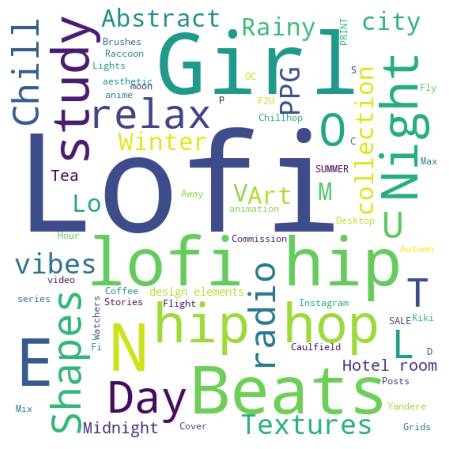

In [161]:
# Cria e gera o word cloud 
word_cloud = WordCloud(width = 550, height = 550,
                       background_color ='white',min_font_size = 12).generate(unique_string)

plt.figure(figsize = (10, 8))
# Mostra a imagem
plt.imshow(word_cloud)
# Remove os eixos
plt.axis("off")
plt.show()

Vemos que as palavras **"Lofi" e "Girl"** são as maiores.

Em tamanho moderado temos **"Beats", "Night", "Hip", "Hop", "Study", "Shape", "Day", "Chill"**.

Algumas palavras menores são **"Vibes", 'Relax', "Winter", "Textures", "Abstract", "Rainy", "City", "Midnight"**.

Temos também palavras minúsculas como **"Coffee", "Stories", "Hotel", "Instagram", "Summer"**

#### 3.2.b) Network das Tags

O objetivo é analisar as tags que os artistas usam no DeviantArt. Para fazer isso, pegamos a coluna “tags” no DataFrame para criar uma matriz de correlação. A primeira etapa é criar um lista das tags para análise.

In [85]:
# Cria uma lista das palavras usdas como tags
corpus=[]
for text in df.tags:
    corpus.append(' '.join(text))
corpus

['8bit artwork arw backtothefuture bladerunner bubblegum delorean digitalart digitaldrawing digitalpainting draw drawing illustration lofi neon pastel photoshop pixel pixelart pixelartist retro sunset retrowave 8bitart citypop 8bitstyle vaporwave pinkaesthetics abueloretrowave lofivibes',
 '80s 8bit artwork arw bladerunner bubblegum dibujodigital digitalart digitaldrawing digitalpainting drawing illustration lofi neon painting pastel photoshop pixel pixelart pixelartist retro pixelartwork retrowave 8bitart citypop 8bitstyle vaporwave pinkaesthetics abueloretrowave lofivibes',
 '8bit aesthetic artwork arw dibujo dibujodigital digitalart digitaldrawing digitalpainting draw drawing illustration lofi neon night painting photoshop pixel pixelart pixelartist retro retroart sunset pixelartwork retrowave 8bitart 8bitstyle vaporwave art abueloretrowave',
 '8bit aesthetic artwork arw city clouds dibujo digitalart digitaldrawing draw drawing halloween illustration lofi night photoshop pixel pixel

Depois de criar o corpus, usamos a ferramenta *CountVectorizer* para contabilizar a lista de vetores e criar a matriz de correlação. 

In [86]:
# Contabiliza as palavras evitando palavras irrelevantes (stop words)
cv = CountVectorizer(ngram_range=(1,1), stop_words = 'english') 
X = cv.fit_transform(corpus)

# Cria uma matriz de correlação multiplicando a transposta da matriz X por ela mesma
Xc = (X.T * X) 
# define os elementos da diagonal da mtriz em zero
Xc.setdiag(0)

# Pega os elementos da matriz
names = cv.get_feature_names() 
# Salva a matriz em um DataFrame
df_tag = pd.DataFrame(data = Xc.toarray(), columns = names, index = names)
df_tag

,2020,2d,2danimation,2ddigital,3d,3jane,80s,80saesthetic,80sanime,8bit,...,yanderesimulator,yanderesimulatoroc,yote,yourname,youtube,zelda,zeldabotw,zeldafanart,ブラッキー,ポケットモンスター
2020,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2d,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2danimation,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,1,0,0,0
2ddigital,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3d,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zelda,0,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
zeldabotw,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
zeldafanart,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ブラッキー,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Na matrix de correlação df_tag, cada número representa a quantidade de vezes que as duas tags foram usadas uma com a outra.

Temos agora que criar uma lista e empilhar as tags.

In [87]:
# Empilha o DataFrame em índices de vários níveis das colunas
links = df_tag.stack().reset_index()
# Renomeia as colunas
links.columns = ['var1', 'var2','value']

print("Quantidade e linha: ",len(links))
links.head()

Quantidade e linha:  1181569


,var1,var2,value
0,2020,2020,0
1,2020,2d,1
2,2020,2danimation,1
3,2020,2ddigital,0
4,2020,3d,0


Para uma melhor visualização, vamos filtrar a quantidade de tags

In [111]:
# Seleciona as tags que aparecem mais de 10 vezes e que são diferentes uma da outra
links_filtered=links.loc[ (links['value'] > 10) & (links['var1'] != links['var2']) ]
links_filtered

,var1,var2,value
2720,2danimation,lofi,11
9793,8bit,8bitart,12
10060,8bit,digitalart,11
10329,8bit,lofi,13
10496,8bit,pixel,12
...,...,...,...
1046240,textures,lofi,11
1110943,vaporwave,aesthetic,16
1110975,vaporwave,anime,13
1111460,vaporwave,lofi,35


Por fim, criamos um network das tags de lofi usando a biblioteca *networkx* e a *matplotlib* para visualizar a rede.

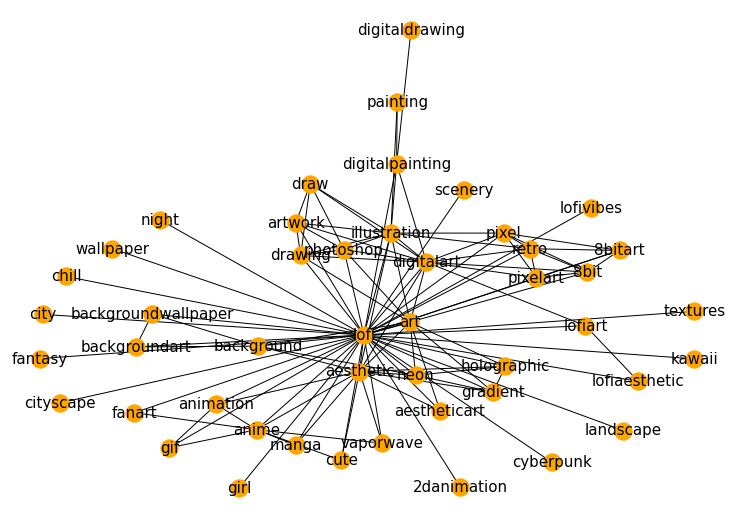

In [116]:
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')
fig = plt.figure(figsize=(10,7))
nx.draw(G, with_labels=True, node_color='orange', font_size=15)
fig.savefig("graph3.png", dpi=500)

Podemos visualizar, no centro da network, a tag lofi se conectando com todas as outras.

Ao redor dela temos as tags "aesthetic", "art", "background", "digitalart", "neon", "holographic", "backgroundwallpaper". 

Nas extremidade, algumas das tags que aparecem são "gif", "manga", "cute", "vaporwave", "cyberpunk", "kawaii", "fantasy", "chill", "night", "8bitart", "lofivibes"

### 3.3 Considerações da Parte 3

Nessa última seção, fimenos uma análise textual dos títulos e das tags usadas para classificar as fã artes existentes no site *DeviantArt*.

Encontramos muitas das palavras que já haviamos vistos na seção anterior, no estudo dos videos do *YouTube*, mostrando que existe um estilo próprio e bem definido relacionado com a esfera lofi. 

## 4. Conclusão do Projeto

Analisamos a esfera lofi através de dados coletados de três fontes diferentes, *Google Trends*, *YouTube*, *DeviantArt*. Podemos verificar os seguintes pontos:

* Houve um aumento na popularidade desse gênero musical e assuntos relacionados a ele durante a pandemia do ano de 2020.

* As principais palavras encontradas que definem a esfera lofi foram: **hip hop, relax, study, sleep, radio, animes, games, chill, chillhop, chilledCow, jazz, boy/girl, chill, coffee, geek, nostalgic, vibes, beats, aesthetic, day, night, winter, summer, midnight, neon, rainy**

Música LoFi é um sucesso. Sons repetitivos de batidas simples, com uma pegada de jazz e quase sempre sem voz, traz uma certa melancolia, também apreciada pela geração que está sempre conectada. Até a baixa qualidade, com seus chiados e tudo mais, possuem um certo charme. Não é à toa que está se tornando uma febre.

É fácil imaginar a cena. Um jovem em seu quarto, lendo, estudando ou apenas navegando nas redes sociais em seu computador. Certamente ele ou ela estará com um fone de ouvido, e neste fone provavelmente estará tocando lofi.